<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference- https://www.tensorflow.org/tutorials/generative/autoencoder

Autoencoders in Tensorflow

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

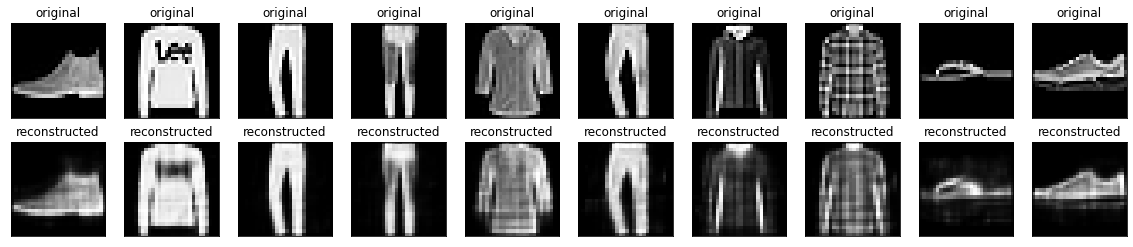

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Using relu

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='relu'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0284 - val_loss: 0.0219
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - val_loss: 0.0205
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0201 - val_loss: 0.0200
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0198 - val_loss: 0.0199
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0197 - val_loss: 0.0197
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0196 - val_loss: 0.0197
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - val_loss: 0.0196
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - val_loss: 0.0196
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0194 - val_loss: 0.0195
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

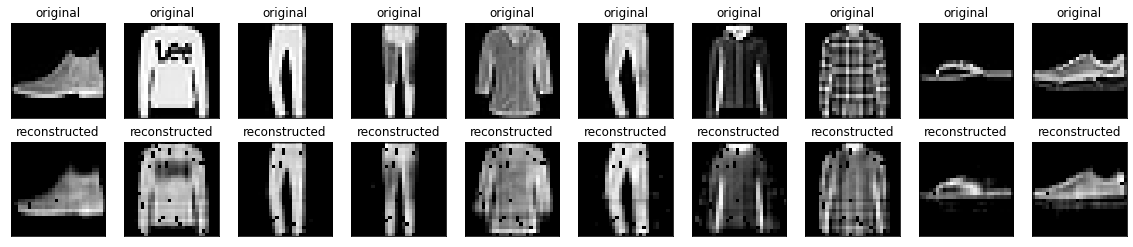

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Tanh Activation

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='tanh'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - val_loss: 0.0156
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0141 - val_loss: 0.0137
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

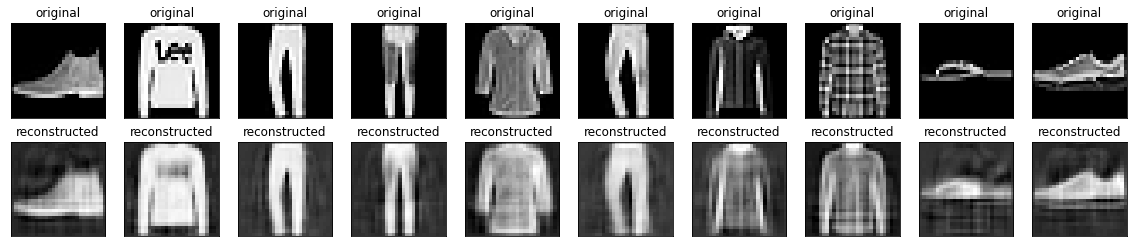

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

NO Activation

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0212 - val_loss: 0.0143
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0133 - val_loss: 0.0130
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0124 - val_loss: 0.0124
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0122 - val_loss: 0.0125
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

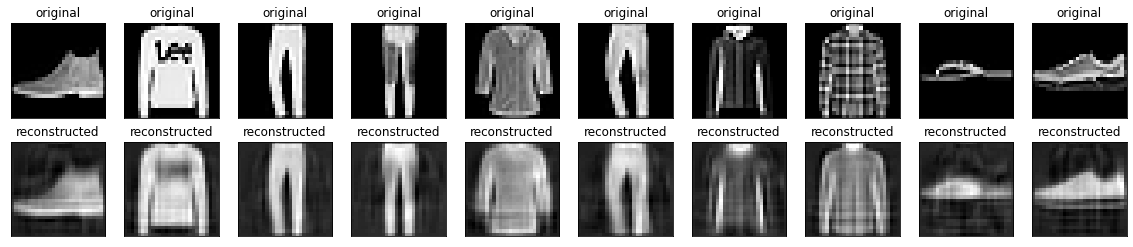

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Convolutional Autoencoders

In [4]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
class conv(Model):
  def __init__(self):
    super(conv, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

aut_conv = conv()

In [7]:
aut_conv.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [8]:
aut_conv.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0119 - val_loss: 0.0050
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.002

In [9]:
aut_conv.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
aut_conv.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [11]:
encoded_imgs = aut_conv.encoder(x_test).numpy()
decoded_imgs = aut_conv.decoder(encoded_imgs).numpy()

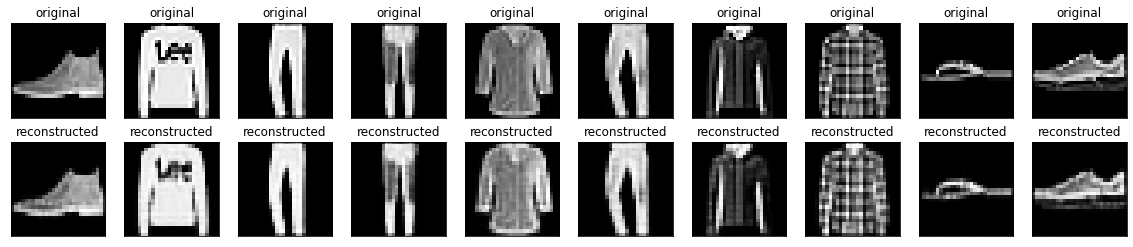

In [12]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

However, you need to take care when choosing padding/strides such that the output has the same dimensions as the input. This can be a problem with MNIST (why?). It also means that the last convolutional (transpose) layer should have as many filters as the input space (e.g. one filter for MNIST or three for CIFAR).

Beacasue output should be of same size of input. Needs upsampling.

Plotting filters

In [17]:


#Select a convolutional layer
layer = aut_conv.layers[1]

#Get weights
kernels, biases = layer.get_weights()[0]

#Normalize kernels into [0, 1] range for proper visualization
kernels = (kernels - np.min(kernels, axis=3)) / (np.max(kernels, axis=3) - np.min(kernels, axis=3))

#Weights are usually (width, height, channels, num_filters)
#Save weight images
import cv2

for i in range(kernels.shape[3]):
    filter = kernels[:, :, :, i]
    cv2.imwrite('filter-{}.png'.format(i), filter)

ValueError: ignored